# PREDICTING FUTURE STOCK PRICES FOR APPLE INC. (AAPL)

### NAME : ASHRAF ALI KHAN PATAN
#### DEEP LEARNING - PORTFOLIO EXAM

- Importing Packages

In [1]:
import yfinance as fin
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter
import seaborn as sns
import warnings
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from torch.utils.tensorboard import SummaryWriter
%load_ext tensorboard
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import math
warnings.filterwarnings("ignore")

<div class="alert alert-block alert-success">
<b> Task 1- The Data
 </b> 
</div>


### Dataset Description
The dataset used in this project consists of historical stock prices for Apple Inc. (AAPL). It includes the following features:
##### Features of the data set 
- **Open**: Opening price of the stock.
- **High**: Highest price during the trading session.
- **Low**: Lowest price during the trading session.
- **Close**: Closing price of the stock.
- **Volume**: Number of shares traded during the session.
- **Dividends**: Dividend amount per share.
- **Stock Splits**: Records of stock split events 
- **Date** : Shows the time range of the data from 1980 to 2024 

The dataset is fetched using the `yfinance` library, which provides comprehensive stock market data. Below is the code to load and display the dataset:

### Why I choose this dataset ?
    - This dataset contains historical stock data for Apple Inc. (AAPL), spanning from 1980 to 2024, and provides detailed financial metrics essential for analyzing stock performance. It includes daily prices such as Open, High, Low, and Close, which capture the stock's movement during a trading session. The dataset also tracks the Volume, showing how many shares were traded, and key events like Dividends, which represent payouts to shareholders, and Stock Splits, which affect share prices and volume. Additionally, the Date column ensures the data is sequential, making it ideal for time-series analysis. This comprehensive dataset offers a rich source of information to analyze Apple's historical trends, identify patterns, and build models for predicting future stock prices or understanding market behavior.
        - Here , basically I am going to predict the close price on daily basis.

- Loading the data 

In [2]:
apple_track = fin.Ticker('AAPL')
apple = apple_track.history(period='max')
pd.options.display.max_columns = None
print("\nApple Historical Data:")
print("\nFirst 5 rows of the data :")
display(apple.head())                       #understanding the first five rows of the data 
print("\nLast five rows of the data :")
display(apple.tail())                       #understanding the last five rows of the data 


Apple Historical Data:

First 5 rows of the data :


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098834,0.099264,0.098834,0.098834,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094108,0.094108,0.093678,0.093678,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087232,0.087232,0.086802,0.086802,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.088951,0.089381,0.088951,0.088951,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091530,0.091959,0.091530,0.091530,73449600,0.0,0.0



Last five rows of the data :


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-11-11 00:00:00-05:00,225.000000,225.699997,221.500000,224.229996,42005600,0.0,0.0
2024-11-12 00:00:00-05:00,224.550003,225.589996,223.360001,224.229996,40398300,0.0,0.0
2024-11-13 00:00:00-05:00,224.009995,226.649994,222.759995,225.119995,48566200,0.0,0.0
2024-11-14 00:00:00-05:00,225.020004,228.869995,225.000000,228.220001,44923900,0.0,0.0
2024-11-15 00:00:00-05:00,226.399994,226.919998,224.270004,225.000000,47832200,0.0,0.0


- Lowercase - column names
    - making all the column names in the apple DataFrame lowercase to keep them consistent and easier to work with.

In [3]:
apple.columns = apple.columns.str.lower() 
apple.head()

,open,high,low,close,volume,dividends,stock splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098834,0.099264,0.098834,0.098834,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094108,0.094108,0.093678,0.093678,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087232,0.087232,0.086802,0.086802,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.088951,0.089381,0.088951,0.088951,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091530,0.091959,0.091530,0.091530,73449600,0.0,0.0


<div class="alert alert-block alert-success">
<b> Task 2- IDA
 </b> 
</div>

- Shape and Type of data.


In [4]:
print(f'Dataset type: {type(apple)}')         #type of the dataset
print(f'Dataset shape: {apple.shape}')        #shape of the dataset

Dataset type: <class 'pandas.core.frame.DataFrame'>
Dataset shape: (11075, 7)


- From the above,i can tell that my data set is stored as data frame which is two dimensional.
- The data set contains 11075 rows and 7 columns.

- Describing the datat set 

In [5]:
apple.describe() #summary statistics

,open,high,low,close,volume,dividends,stock splits
count,11075.000000,11075.000000,11075.000000,11075.000000,1.107500e+04,11075.000000,11075.000000
mean,22.869337,23.113548,22.635748,22.885239,3.162152e+08,0.000792,0.001535
std,48.362940,48.871644,47.885864,48.403608,3.350389e+08,0.012182,0.083372
min,0.038245,0.038245,0.037815,0.037815,0.000000e+00,0.000000,0.000000
25%,0.242778,0.247833,0.237676,0.242824,1.118470e+08,0.000000,0.000000
50%,0.440671,0.447925,0.433264,0.439556,2.040924e+08,0.000000,0.000000
75%,17.913108,18.060238,17.633959,17.806570,3.971620e+08,0.000000,0.000000
max,235.947003,237.229001,234.192340,236.220108,7.421641e+09,0.250000,7.000000


- The describe() method is used to perfom statistical calculations
- The dataset covers 11,075 days of Apple’s stock market history, showing how prices and trading volumes changed over time:

    - Stock Prices: On average, prices ranged from $22 to $23, but they’ve varied a lot, with the lowest price being $0.037 (likely due to early data or splits) and the highest at $236.22.
    - Trading Volume: About 316 million shares are traded daily on average, but on some days, this went up to 7.42 billion.
    - Dividends and Splits: Dividends were tiny, and stock splits happened occasionally, with the biggest being 7-for-1.

In [6]:
apple.info()   #information about the data set

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11075 entries, 1980-12-12 00:00:00-05:00 to 2024-11-15 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   open          11075 non-null  float64
 1   high          11075 non-null  float64
 2   low           11075 non-null  float64
 3   close         11075 non-null  float64
 4   volume        11075 non-null  int64  
 5   dividends     11075 non-null  float64
 6   stock splits  11075 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 692.2 KB


- This is the description of my apple data set which contains 11,075 rows, each representing a trading day for Apple Inc. (AAPL) from 1980 to 2024. It includes 7 columns:
    - Open, High, Low, Close: Daily stock prices (type: float64).
    - Volume: Number of shares traded daily (type: int64).
    - Dividends: Dividend amount per share (type: float64).
    - Stock Splits: Records of stock split events (type: float64).

- All data is complete, with no missing values, and the dataset size is approximately 692 KB.

#### Feature Engineering

In [7]:
apple['SMA_20'] = apple['close'].rolling(window=20).mean()      # 20-day Simple Moving Average (SMA)

# RSI Calculation
delta = apple['close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
apple['RSI'] = 100 - (100 / (1 + rs))

# Bollinger Bands
rolling_std = apple['close'].rolling(window=20).std()
apple['Bollinger_Upper'] = apple['SMA_20'] + (2 * rolling_std)
apple['Bollinger_Lower'] = apple['SMA_20'] - (2 * rolling_std)

# Daily percentage change
apple['percentage_change_today'] = ((apple['close'] - apple['open']) / apple['open']) * 100

# Tomorrow's close percentage change
apple['tomorrow_close'] = apple['close'].shift(-1)
apple['percentage_change'] = ((apple['tomorrow_close'] - apple['close']) / apple['close']) * 100
apple.dropna(subset=['percentage_change'], inplace=True)


- Enhancing the dataset by creating new features that help capture important patterns and trends in stock price movements.
- It calculates the **20-day Simple Moving Average (SMA)** to smooth out daily price fluctuations and identify trends, while the **Relative Strength Index (RSI)** measures momentum, indicating whether the stock is overbought or oversold. **Bollinger Bands** add upper and lower price limits around the SMA, helping to detect price volatility.
-  Additionally, the **daily percentage change** shows how much the stock price fluctuates within a day, and the **tomorrow's close percentage change** provides a target variable for predicting future stock prices. These features are essential for improving a model’s ability to learn from the data by offering more insights into market behavior, trends, and price movements.

<div class="alert alert-block alert-success">
<b> Task 3- Preprocessing
 </b> 
</div>

- Cleaning and prepare the DataFrame, with a simplified structure for further analysis.

In [8]:
df_clean = apple.dropna()

- Remove Missing Data: Drops any rows with missing values using dropna().

In [9]:
df_clean.reset_index(inplace=True)

- Reset Index: Resets the index so the dataset has a clean, sequential index after dropping rows.

In [10]:
df_clean.rename(columns={'stock splits': 'stock_splits'}, inplace=True)


- Rename Column: Renames the column stock splits to stock_splits for easier access in the code.

In [11]:
df_clean['Date'] = df_clean['Date'].dt.date

- Simplify Date: Converts the Date column to only include the date part.

<div class="alert alert-block alert-success">
<b> Task 4- EDA
 </b> 
</div>

- Exploratory Data Analysis is a data exploaration technique to understand the various aspects of the data.
- Aim : Understanding and exploring the data , make sure the data is clean ,do not have any missing values or even null values in the data set, knowing the important variables in the data set and removing null values that may actually hinder the accuracy of conclusions when we work on model building.
- EDA helps us to identify the faulty points in the data
- EDA helps us to understand the relationship between the variables which gives us the wider perspective on the data.
- It includes several techniques in a sequence that we have to follow.
- steps :
1. Data cleaning - to get rid of the redundencies variables which means removing unwanted columns because it may overfit or underfit the model 
2. Analysis of relationship between the variables.

### Visualizing few more plots for better analysis


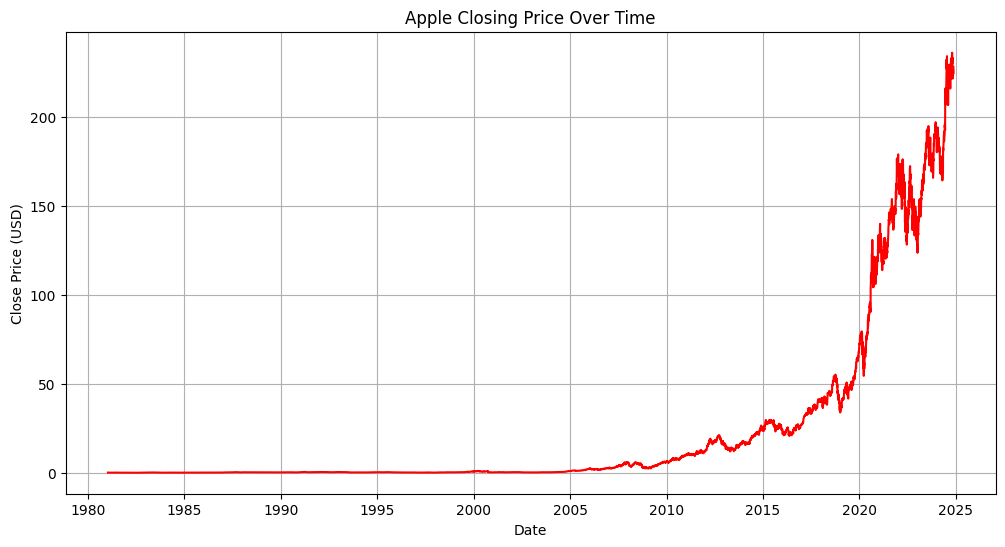

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(df_clean['Date'], df_clean['close'], color='red')
plt.title('Apple Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.grid()
plt.show()  # to show the plot


- This chart shows Apple Inc.'s closing stock price from 1980 to 2025. 
- The x-axis represents time, while the y-axis shows the stock price in USD. 
- For many years, the price remained low, but starting around 2013, it began to rise sharply, reaching over $200 in recent years. 
- The line highlights Apple’s significant growth, reflecting its success and increasing market value over time.

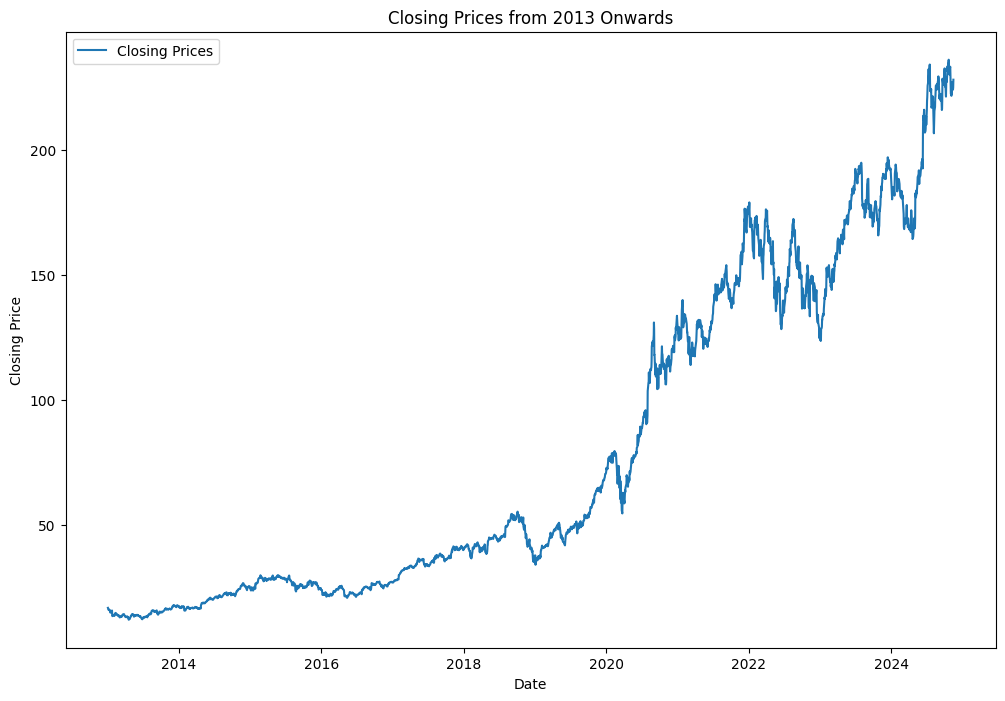

In [13]:
df_clean['Date'] = pd.to_datetime(df_clean['Date'])         # ensuring that Date column is in datetime format
df_2013 = df_clean[df_clean['Date'] >= '2013-01-01']        # Filtering the data for dates starting from 2013-01-01

# Plotting the data
plt.figure(figsize=(12, 8))
plt.plot(df_2013['Date'], df_2013['close'], label='Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Prices from 2013 Onwards')
plt.legend()
plt.show()


- This chart shows Apple’s stock prices from 2013 onward.
-  It focuses on the more recent years to give a clearer picture of how the stock has performed. 
- From 2013 to 2019, the stock price grew steadily, but starting in 2020, it rose much faster with some ups and downs. 
- This period reflects Apple’s rapid growth and some market volatility. 
- The chart helps us see how Apple’s stock has become more valuable over the last decade.

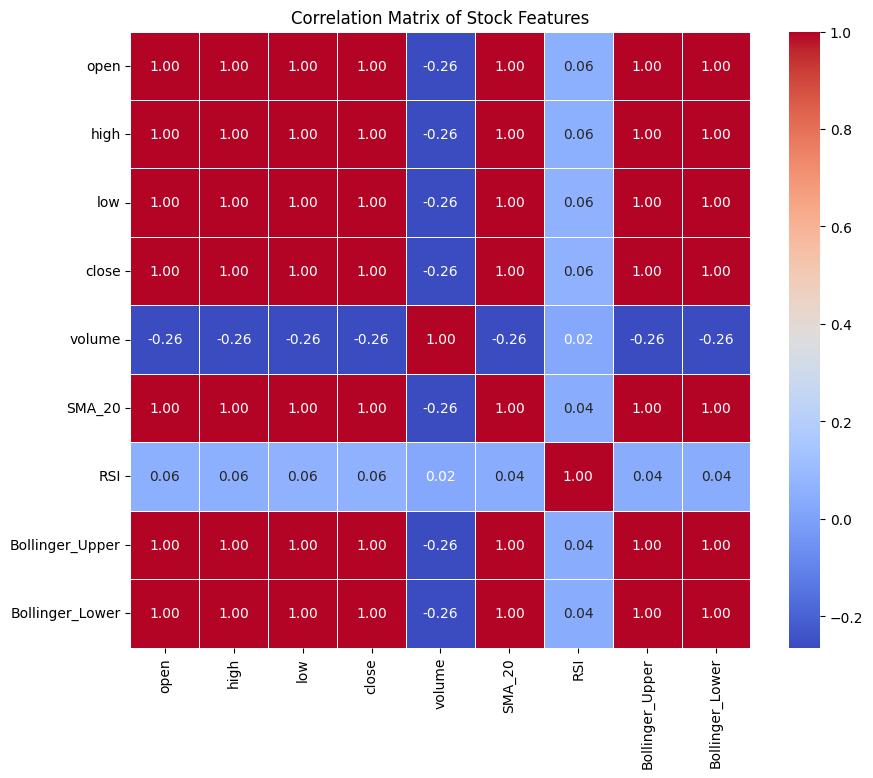

In [14]:
numerical_columns = ['open', 'high', 'low', 'close', 'volume', 'SMA_20', 'RSI', 'Bollinger_Upper', 'Bollinger_Lower']   # numerical columns for correlation
correlation_matrix = df_clean[numerical_columns].corr()
# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Stock Features')
plt.show()

- This is a correlation matrix showing how different stock features like open price, high price, low price, close price, volume, and technical indicators (e.g., SMA, RSI, Bollinger Bands) relate to each other.
- The values range from -1 to 1:
    - 1 (red): Strong positive relationship (e.g., when one value increases, the other also increases).
    - -1 (blue): Strong negative relationship (e.g., when one value increases, the other decreases).
    - 0: No relationship.
- For example:
    - The open, high, low, and close prices are highly correlated (close to 1), meaning they tend to move together.
    - Volume has a weak or no relationship with prices and indicators (values close to 0).
    - This matrix helps identify which features are strongly or weakly connected, useful for understanding stock behavior.

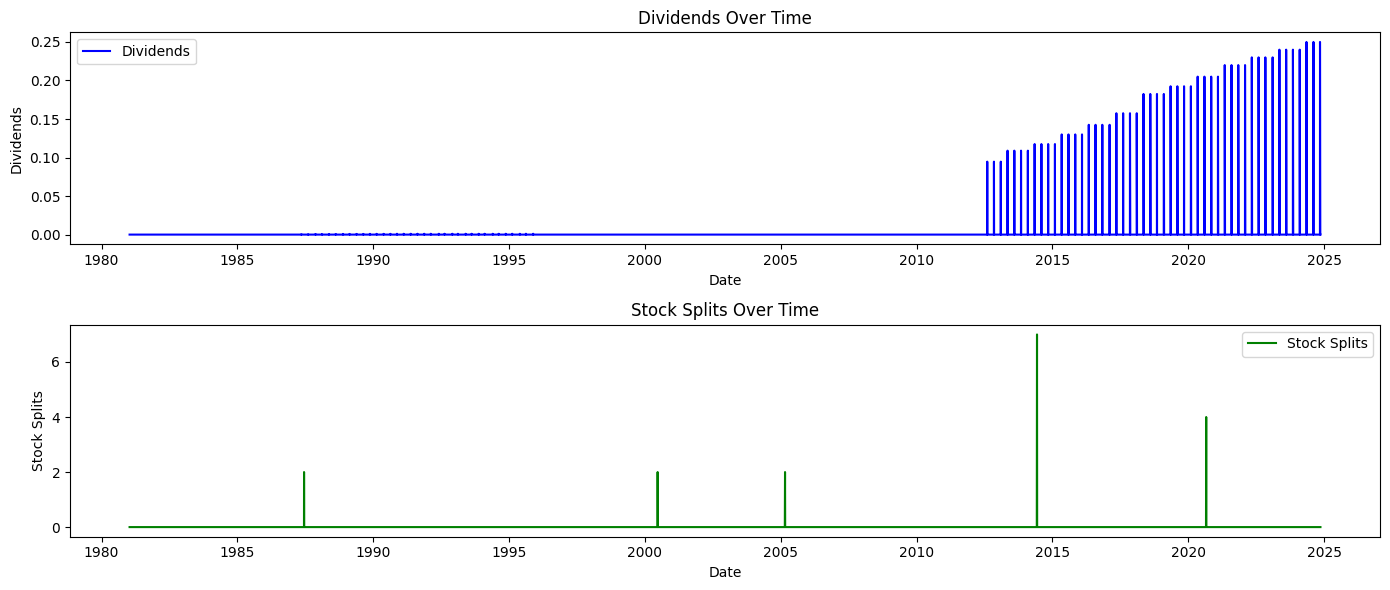

In [15]:
# Assuming df_clean is DataFrame with the cleaned data
plt.figure(figsize=(14, 6))

# Plot for dividends
plt.subplot(2, 1, 1)
plt.plot(df_clean['Date'], df_clean['dividends'], color='blue', label='Dividends')
plt.xlabel('Date')
plt.ylabel('Dividends')
plt.title('Dividends Over Time')
plt.legend()

# Plot for stock splits
plt.subplot(2, 1, 2)
plt.plot(df_clean['Date'], df_clean['stock_splits'], color='green', label='Stock Splits')
plt.xlabel('Date')
plt.ylabel('Stock Splits')
plt.title('Stock Splits Over Time')
plt.legend()

plt.tight_layout()
plt.show()

- Here , we can see two simple charts of showing Apple's dividends and stock splits over time.
    
    - Dividends Over Time (Top Chart):
        - It shows how much Apple paid in dividends (money given back to shareholders) from 1980 to 2025.
        - There were no dividends before 2012, but from then on, they steadily increased, showing Apple’s commitment to rewarding shareholders.

    - Stock Splits Over Time (Bottom Chart):
        - It shows when Apple split its stock (divided shares to make them cheaper).
        - Stock splits happened a few times, like in the 1980s, 2000s, and more recently in 2020.
- These charts provide a quick view of Apple's strategies for rewarding investors and making its stock more accessible.

In [16]:
# Assuming df_clean is  DataFrame and has a DateTime index
df_clean.set_index('Date', inplace=True)                        # Setting 'Date' column  as the index
events = df_clean[(df_clean['dividends'] > 0) | (df_clean['stock_splits'] > 0)]         # Filtering the rows where dividends or stock_splits occurred
before_avg_change = []
after_avg_change = []           # initializing lists to hold results

for date in events.index:
    # Define the window of 5 days before and after the event
    before_window = df_clean.loc[date - pd.Timedelta(days=5):date - pd.Timedelta(days=1)]
    after_window = df_clean.loc[date + pd.Timedelta(days=1):date + pd.Timedelta(days=5)]

    # Calculate daily percentage changes in the 'close' price within each window
    before_pct_change = before_window['close'].pct_change().dropna() * 100
    after_pct_change = after_window['close'].pct_change().dropna() * 100

    # Calculate the average percentage change for each window
    before_avg_change.append(before_pct_change.mean())
    after_avg_change.append(after_pct_change.mean())

# Create a DataFrame to summarize the results
avg_change_df = pd.DataFrame({
    'Event Date': events.index,
    'Average % Change (5 Days Before)': before_avg_change,
    'Average % Change (5 Days After)': after_avg_change
})
print(avg_change_df)


   Event Date  Average % Change (5 Days Before)  \
0  1987-05-11                         -0.622512   
1  1987-06-16                         -0.316574   
2  1987-08-10                          3.738481   
3  1987-11-17                         -2.606623   
4  1988-02-12                          1.603546   
..        ...                               ...   
85 2023-11-10                          0.590366   
86 2024-02-09                          0.115274   
87 2024-05-10                          0.522520   
88 2024-08-12                          1.518460   
89 2024-11-08                          0.819712   

    Average % Change (5 Days After)  
0                          1.222287  
1                          0.632143  
2                         -0.334070  
3                         -0.964622  
4                          1.515046  
..                              ...  
85                         0.866335  
86                        -0.804207  
87                         0.919575  
88     

- Here , we are calculating the average percentage change in the stock price for a 5-day window before and after each event.

- An event refers to something significant happening with Apple’s stock, like:
     - Dividends: Payments made to shareholders as a reward for holding the stock.
    - Stock Splits: When shares are divided into smaller ones to make them cheaper.
- This analysis checks how these events affect stock prices before and after they occur.

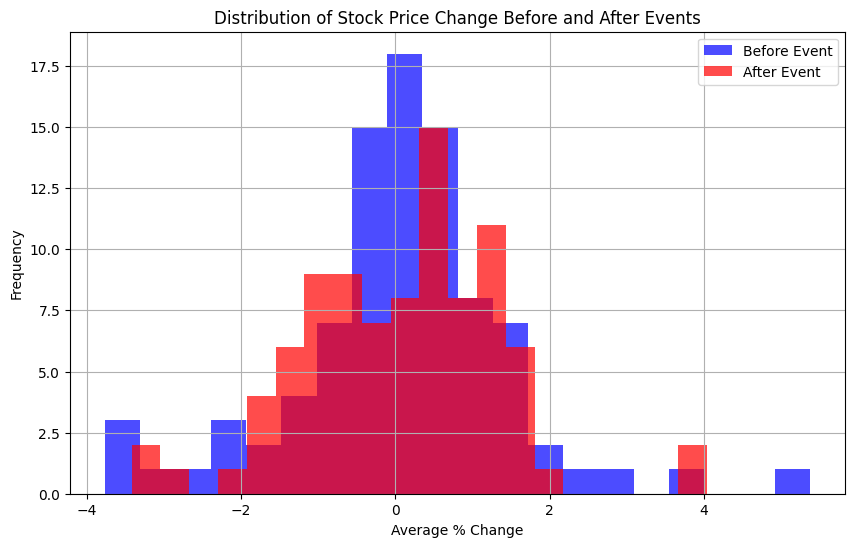

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(avg_change_df['Average % Change (5 Days Before)'], bins=20, alpha=0.7, label='Before Event', color='blue')
plt.hist(avg_change_df['Average % Change (5 Days After)'], bins=20, alpha=0.7, label='After Event', color='red')
plt.title('Distribution of Stock Price Change Before and After Events')
plt.xlabel('Average % Change')                                                                      # Plot histograms for before and after percentage change
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


- In the plot above, Blue bars show how often certain percentage changes occurred before the events.Red bars show the same, but after the events.
- Key Insights:
    - Both distributions are centered near 0% change, meaning most price movements are minor.
    - Comparing the red and blue bars helps identify if stock prices behave differently before or after these events.
    - This analysis helps understand how events like dividends and stock splits influence Apple's stock price.

In [18]:
df_clean.reset_index(inplace=True)
df_clean.dtypes

Date                       datetime64[ns]
open                              float64
high                              float64
low                               float64
close                             float64
volume                              int64
dividends                         float64
stock_splits                      float64
SMA_20                            float64
RSI                               float64
Bollinger_Upper                   float64
Bollinger_Lower                   float64
percentage_change_today           float64
tomorrow_close                    float64
percentage_change                 float64
dtype: object

- The above shows the structure of the df_clean DataFrame, listing its columns and data types. Here's what it contains:
    - Date: The date of each stock entry.
    - Stock Prices: Includes open, high, low, and close prices for the day.
    - Volume: Total number of shares traded on that day.
    - Dividends and Stock Splits: Indicates if any dividends were paid or stock splits occurred.
    - Technical Indicators:
    - SMA_20: 20-day moving average of the stock price.
    - RSI: A measure of price momentum.
    - Bollinger_Upper and Bollinger_Lower: Indicators for price volatility.
    - Price Changes:
        - percentage_change_today: Daily percentage change in stock price.
        - tomorrow_close: Predicted closing price for the next day.
        - percentage_change: General percentage change in stock price.
- These columns are used to analyze stock performance and trends.

In [19]:
df = df_clean


- I have copied the df_clean data frame to df , so that it doesn't change the actual data even if we make further changes.

<div class="alert alert-block alert-success">
<b> Task 5- Baselines
 </b> 
</div>

In [20]:
df_clean['Date'] = pd.to_datetime(df_clean['Date'])         # ensuring that Date column is in datetime format
df_clean['year'] = df_clean['Date'].dt.year
df_clean['month'] = df_clean['Date'].dt.month               # extracting year, month, and day from the Date column
df_clean['day'] = df_clean['Date'].dt.day

# Drop the Date column and the specified columns
df_clean = df_clean.drop(columns=['Date', 'percentage_change_today', 'percentage_change'])
# Separate features (X) and target (y)
X = df_clean.drop(columns=['close'])  # Features
y = df_clean['close']  # Target (close price)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Feature Scaling (optional but generally helpful for linear models)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

- Preparing the stock data for machine learning by:

    - Converting the Date column to datetime and extracting year, month, and day as new features.
    - Dropping unnecessary columns (Date, percentage_change_today, percentage_change).
    - Separating features (X) and target (y), where y is the close price to be predicted.
    - Splitting the data into training (70%) and testing (30%) sets for model training and evaluation.
    - Scaling the features to a range of 0 to 1 using MinMaxScaler for better model performance.
- This ensures the data is clean, structured, and ready for training a machine learning model.

### Learning Model - SVM

In [21]:
svm_model = SVR()           
svm_model.fit(X_train_scaled, y_train)      # training the model
svm_predictions = svm_model.predict(X_test_scaled)          # for making predictions

# evaluating the model using Mean Absolute Error (MAE), Mean Squared Error (MSE) , Root Mean Squared Error (RMSE)
svm_mae = mean_absolute_error(y_test, svm_predictions)
svm_mse = mean_squared_error(y_test, svm_predictions)
svm_rmse = math.sqrt(svm_mse)
svm_r2 = r2_score(y_test, svm_predictions)
print(f"SVM - MAE: {svm_mae:.4f}, MSE: {svm_mse:.4f}, RMSE : {svm_rmse : .4f}, R2_score : {svm_r2}")

SVM - MAE: 1.4821, MSE: 36.7137, RMSE :  6.0592, R2_score : 0.9842444085182167


- Here , I am using a Support Vector Regressor(SVR), to predict the stock's closing price based on prepared features.
- Training the model using the historical stock data to learn how the features relate to the closing price.
- After training, the model predicts closing prices for unseen test data to see how well it generalizes.
- Measuring Errors:
    - The predictions are evaluated using the following metrics:
        - Mean Absolute Error (MAE): Shows the average difference between the model's predictions and the actual prices.
        - Mean Squared Error (MSE): Similar to MAE but penalizes larger errors more heavily.
        - Root Mean Squared Error (RMSE): Represents the overall error magnitude in the same units as the target variable.
        - R² Score: Indicates how well the model explains the variability in the actual closing prices. A value closer to 1 signifies better performance.
- Output:
    - The model achieves the following metrics:
        - MAE: 1.4820, MSE: 36.7130, RMSE: 6.0591, and R² Score: 0.9842.
- These values demonstrate that the model performs well, with minimal error and a high ability to explain the variation in stock prices.

### Suitable Heuristic

In [22]:
# using the overall median of the 'close' prices as the prediction
overall_median = df_clean['close'].median()
df_clean['median_pred'] = overall_median
y_true = df_clean['close']                              #defining actual and predicted values
y_pred_median = df_clean['median_pred']         
median_mae = mean_absolute_error(y_true, y_pred_median)         # calculating MAE (Mean Absolute Error) for the median model
median_mse = mean_squared_error(y_true, y_pred_median)           # calculating MSE (Mean Squared Error) for the median model
median_rmse = math.sqrt(median_mse)
median_r2 = r2_score(y_true, y_pred_median)                              # calculating RMSE (Mean Squared Error) for the median model
print("Median Model (Overall) - Mean Absolute Error (MAE):", median_mae)
print("Median Model (Overall) - Mean Squared Error (MSE):", median_mse)
print("Median Model (Overall) - Mean Squared Error (MSE):", median_rmse)
print("Median Model (Overall) - R² Score:", median_r2)

Median Model (Overall) - Mean Absolute Error (MAE): 22.679125112261115
Median Model (Overall) - Mean Squared Error (MSE): 2846.8755045869757
Median Model (Overall) - Mean Squared Error (MSE): 53.3561196545155
Median Model (Overall) - R² Score: -0.21539360563194854


- Evaluating a simple prediction model that always uses the median closing price from the dataset as the predicted value. This approach compares the constant median prediction against the actual closing prices using key metrics:
    
    - Mean Absolute Error (MAE): On average, the model's predictions are off by 22.68, which is a considerable error.
    - Mean Squared Error (MSE): The squared difference averages to 2846.88, emphasizing even larger prediction deviations.
    - Root Mean Squared Error (RMSE): The overall error magnitude is 53.36, reflecting significant inaccuracies in the predictions.
    - R² Score: The model scores -0.21, indicating that it fails to explain the variability in closing prices and performs worse than simply predicting the average.

- These results show that using the overall median as a prediction is not effective for this dataset, as it does not capture the underlying patterns or trends in the data.

##### In Comparison, SVM's performance is better compared to the non-learning model.So , I would prefer using SVM as it is a learning model, it has less error percentage.

<div class="alert alert-block alert-success">
<b> Task 6- Deep Learning Experiments
 </b> 
</div>

- Preprocessing for deep learning

In [23]:
print(df.head())  
closing_prices = df['close'].values.reshape(-1, 1)      
scaler = MinMaxScaler(feature_range=(0, 1))                     # scaling the data to a range between 0 and 1 using MinMaxScaler
closing_prices_scaled = scaler.fit_transform(closing_prices)

        Date      open      high       low     close    volume  dividends  \
0 1981-01-12  0.109577  0.109577  0.108718  0.108718  23699200        0.0   
1 1981-01-13  0.105281  0.105281  0.104851  0.104851  23049600        0.0   
2 1981-01-14  0.105281  0.105710  0.105281  0.105281  14291200        0.0   
3 1981-01-15  0.107429  0.108288  0.107429  0.107429  14067200        0.0   
4 1981-01-16  0.106999  0.106999  0.106570  0.106570  13395200        0.0   

   stock_splits    SMA_20        RSI  Bollinger_Upper  Bollinger_Lower  \
0           0.0  0.106720  60.465319         0.129272         0.084168   
1           0.0  0.107021  52.756480         0.129288         0.084753   
2           0.0  0.107601  49.152564         0.128992         0.086209   
3           0.0  0.108632  45.454693         0.127660         0.089605   
4           0.0  0.109513  29.544845         0.126190         0.092836   

   percentage_change_today  tomorrow_close  percentage_change  year  month  \
0             

- Displaying first five rows of the data .
- The close column(representing stocks closing prices) is extracted and reshaped into a column vector.This is necessary because the scaler expects the input in format.
- The closing prices are scaled to a range between 0 and 1 using MinMaxScaler. This ensures all values are on the same scale, making them easier to work with for models like machine learning or visualization.

- Data Preparation

In [24]:
def prepare_data(data, n_steps):
    x, y = [], []
    for i in range(len(data) - n_steps):
        x.append(data[i:i + n_steps, 0])  # 'n_steps' time steps as input features
        y.append(data[i + n_steps, 0])    # Next day's closing price as target
    return np.array(x), np.array(y)
n_steps = 100                                               # prepaing the data with a sequence length of 100
X, y = prepare_data(closing_prices_scaled, n_steps)
X = X.reshape((X.shape[0], X.shape[1], 1))                  # reshaping X for LSTM input (3D input: [samples, timesteps, features])

- Preparing the stock price data for an LSTM model by creating sequences of past prices to predict the next day's price. 
- The prepare_data function splits the data into inputs (X) and targets (y). Each input consists of 100 consecutive closing prices, and the target is the price immediately following that sequence. 
- This allows the model to use patterns from the past 100 days to make predictions. 
- The data is then reshaped into a 3D format required by LSTM models, with dimensions representing the number of sequences, the 100 days in each sequence, and the single feature (closing price). 
- This process ensures the data is properly structured for the LSTM to recognize time-based patterns and predict future stock prices.

In [25]:
#  Train/Test Split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Converting to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

- Here ,spliting the prepared data into training and testing sets to train and evaluate the model. 
- First, 80% of the data is allocated for training, and the remaining 20% is used for testing. 
- The train_size is calculated based on 80% of the total data length, and the inputs (X) and targets (y) are divided accordingly.
-  The training set helps the model learn patterns, while the testing set evaluates how well it performs on unseen data. 
- After splitting, the data is converted into PyTorch tensors, which are the data structures required for PyTorch models. 
- This conversion ensures the data is in the correct format and ready to be used for model training and testing.

In [26]:
#  Create DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

- Creating a  DataLoaders to manage the training and testing data in smaller, manageable batches. 
- It combines the input data (X) and targets (y) into datasets using TensorDataset. 
- Each batch will contain 128 samples, making the training process more efficient.
- The training data is shuffled to help the model learn better, while the test data is kept in order for accurate evaluation. 
- These DataLoaders make it easier and faster to feed data to the model during training and testing.

### Defining basic LSTM model

In [27]:
class LSTMModel(nn.Module):                                                     # defining LSTM Model
    def __init__(self, input_size, hidden_layer_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_layer_size, batch_first=True)
        self.fc = nn.Linear(hidden_layer_size, output_size)

    def forward(self, x):
        lstm_out, (hn, cn) = self.lstm(x)
        out = self.fc(lstm_out[:, -1, :])  # using the output of the last timestep
        return out
input_size = X_train.shape[2]
hidden_layer_size = 100
output_size = 1
model = LSTMModel(input_size, hidden_layer_size, output_size)

- Defining an LSTM model to predict stock prices. 
- The model has two main layers: an LSTM layer to process sequential data and a fully connected layer to output the predicted price. 
- During the forward pass, the LSTM processes the input, and the last timestep's output is passed to the fully connected layer to generate the prediction. 
- The model is initialized with an input size (number of features), a hidden layer size of 100 (number of LSTM units), and an output size of 1 (the predicted stock price). It’s now ready for training.

In [28]:
# defining Loss and Optimizer
criterion = nn.MSELoss()  # Mean Squared Error for regression
optimizer = optim.Adam(model.parameters(), lr=0.0001)

- - Using Mean Squared Error (MSE) as the loss function to measure how far the predictions are from the actual values, which is perfect for regression tasks. 
- - The Adam optimizer is used to adjust the model's parameters during training, with a learning rate of 0.001 to control how fast it learns. This  ensures the model improves its predictions over time.

- Training the model 
    - - I have used the number of epochs as 15,20 and 30 .
    - - number of epochs of 15 gave the best results out of all .I think the model was overrfitting when i used higher number of epochs.

In [29]:
# Training the Model
num_epochs = 15
for epoch in range(num_epochs):
    model.train()                                        
    for inputs, targets in train_loader:
        optimizer.zero_grad()                               # for clearing the previous gradients
        outputs = model(inputs)                             # Getting model predictions
        loss = criterion(outputs, targets.view(-1, 1))              # calculating loss
        loss.backward()                                         # Backpropagate the error
        optimizer.step()                                        # updating the model weights

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

Epoch 1/15, Loss: 0.0008103316067717969
Epoch 2/15, Loss: 0.0008534959051758051
Epoch 3/15, Loss: 0.000809808901976794
Epoch 4/15, Loss: 0.00032282862230204046
Epoch 5/15, Loss: 0.00057395757175982
Epoch 6/15, Loss: 2.5502480639261194e-05
Epoch 7/15, Loss: 5.600957592832856e-06
Epoch 8/15, Loss: 8.750800589041319e-06
Epoch 9/15, Loss: 3.6993312733102357e-06
Epoch 10/15, Loss: 7.831673428881913e-06
Epoch 11/15, Loss: 3.684751163746114e-06
Epoch 12/15, Loss: 2.994728220073739e-06
Epoch 13/15, Loss: 4.3014938455598895e-06
Epoch 14/15, Loss: 4.462428023543907e-06
Epoch 15/15, Loss: 5.4804831961519085e-06


- Traing the model for 15 epochs.
- In each epoch, the model learns by processing batches of data from the training set. 
- For each batch, it predicts the target values, calculates the error using the loss function, and adjusts its weights using backpropagation and the optimizer. After every epoch, the loss for the last batch is printed to track the model's progress. This process helps the model improve its predictions over time.

In [30]:
# Model Evaluation
model.eval()
with torch.no_grad():
    test_predictions = []
    test_actuals = []
    for inputs, targets in test_loader:
        outputs = model(inputs)
        test_predictions.append(outputs.numpy())
        test_actuals.append(targets.numpy())
    test_predictions = np.concatenate(test_predictions, axis=0)
    test_actuals = np.concatenate(test_actuals, axis=0)
mae = mean_absolute_error(test_actuals, test_predictions)
mse = mean_squared_error(test_actuals, test_predictions)
rmse = math.sqrt(mse)
r2 = r2_score(test_actuals, test_predictions)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (MSE): {rmse :.4f}')
print(f'R2 Score: {r2:.4f}')

Mean Absolute Error (MAE): 0.1037081852555275
Mean Squared Error (MSE): 0.0188
Root Mean Squared Error (MSE): 0.1370
R2 Score: 0.7367


- Evaluating the model's performance on the test data involves making predictions without updating the model's weights. 
- The predicted and actual values are compared using various metrics. 
    - The Mean Absolute Error (MAE) is 0.103, indicating that the model's predictions deviate from the actual values by about 0.103 on average. 
    - The Mean Squared Error (MSE) is 0.0188, showing that larger errors are relatively rare, and the Root Mean Squared Error (RMSE), which gives more weight to bigger errors, is 0.1370. 
    - Additionally, the R2 Score, which measures how well the model captures the variance in the data, is 0.7367, indicating the model performs very well overall. 
    - While the error metrics suggest the model makes reasonably accurate predictions, the slight deviations highlight that there’s still room to improve its precision in certain areas.

#### Adding dropouts for the LSTM model

In [31]:
input_size = X_train.shape[2]
hidden_layer_size = 100
output_size = 1
dropout_probs = [0.1, 0.2, 0.3]  # Dropout probabilities to experiment with
num_epochs = 15  # No. of epochs
train_losses_all = {}  # Dictionary to store training losses for each dropout value
val_losses_all = {}  # Dictionary to store validation losses for each dropout value
predicted_close_prices_all = {}  # To store predicted close prices for each dropout setting

In [32]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_layer_size, output_size, dropout_prob):   
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_layer_size, batch_first=True, dropout=dropout_prob)  # Defining LSTM layer with dropout
        self.fc = nn.Linear(hidden_layer_size, output_size)
    def forward(self, x):
        lstm_out, (hn, cn) = self.lstm(x)
        out = self.fc(lstm_out[:, -1, :])
        return out

-  The __init__ method initializes the model with an LSTM layer that incorporates dropout for regularization, preventing overfitting, and a fully connected layer that maps the LSTM's output to the desired target size. 
- In the forward method, data is passed through the LSTM layer, which processes the sequence and produces outputs for each time step. 

- Important parameters and data structures for training and evaluating an LSTM model.
- Defining the input size based on the training data, a hidden layer size of 100, and an output size of 1 (predicting one value). 
- It includes a list of dropout probabilities (0.1, 0.2, 0.3) for experimentation to improve regularization. 
- The training will run for 15 epochs, and dictionaries are initialized to store training and validation losses as well as predicted close prices for each dropout setting. 

In [33]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")           # ensuring the device is set (CPU or GPU)
for dropout_prob in dropout_probs:
    print(f"Training with dropout probability: {dropout_prob}")
    model = LSTMModel(input_size, hidden_layer_size, output_size, dropout_prob).to(device)      # Creating the model for the current dropout probability
    # defining Loss and Optimizer
    criterion = nn.MSELoss()                                     # Mean Squared Error for regression
    optimizer = optim.Adam(model.parameters(), lr=0.0001)
    # Resetting the loss trackers for this dropout setting
    train_losses = []
    val_losses = []
    for epoch in range(num_epochs):
        model.train()                                # Training the model with validation loss tracking
        running_train_loss = 0.0
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)  # Ensuring tensors are on the same device
            optimizer.zero_grad()  # Clearing previous gradients
            outputs = model(inputs)  
            loss = criterion(outputs, targets.view(-1, 1))  # Compute loss
            loss.backward()  
            optimizer.step()  
            running_train_loss += loss.item()

        avg_train_loss = running_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)                                 # Calculating average training loss

        model.eval()                        # Setting the model to evaluation mode
        running_val_loss = 0.0
        with torch.no_grad():
            for inputs, targets in test_loader:
                inputs, targets = inputs.to(device), targets.to(device)  
                outputs = model(inputs)  
                loss = criterion(outputs, targets.view(-1, 1))  
                running_val_loss += loss.item()

        avg_val_loss = running_val_loss / len(test_loader)               # Calculating average validation loss
        val_losses.append(avg_val_loss)
        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}')
    train_losses_all[dropout_prob] = train_losses
    val_losses_all[dropout_prob] = val_losses             # Storing the losses for this dropout setting
    predicted_close_prices = []
    real_close_prices = []
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)  
            outputs = model(inputs)
            predicted_close_prices.extend(outputs.squeeze().cpu().numpy())  
            real_close_prices.extend(targets.cpu().numpy())  
    predicted_close_prices_all[dropout_prob] = (predicted_close_prices, real_close_prices)      # Storing predicted and actual close prices for this dropout probability

Training with dropout probability: 0.1
Epoch 1/15, Train Loss: 0.0008, Validation Loss: 0.2493
Epoch 2/15, Train Loss: 0.0007, Validation Loss: 0.2257
Epoch 3/15, Train Loss: 0.0006, Validation Loss: 0.1875
Epoch 4/15, Train Loss: 0.0004, Validation Loss: 0.0748
Epoch 5/15, Train Loss: 0.0000, Validation Loss: 0.0117
Epoch 6/15, Train Loss: 0.0000, Validation Loss: 0.0044
Epoch 7/15, Train Loss: 0.0000, Validation Loss: 0.0024
Epoch 8/15, Train Loss: 0.0000, Validation Loss: 0.0012
Epoch 9/15, Train Loss: 0.0000, Validation Loss: 0.0007
Epoch 10/15, Train Loss: 0.0000, Validation Loss: 0.0005
Epoch 11/15, Train Loss: 0.0000, Validation Loss: 0.0006
Epoch 12/15, Train Loss: 0.0000, Validation Loss: 0.0007
Epoch 13/15, Train Loss: 0.0000, Validation Loss: 0.0011
Epoch 14/15, Train Loss: 0.0000, Validation Loss: 0.0013
Epoch 15/15, Train Loss: 0.0000, Validation Loss: 0.0017
Training with dropout probability: 0.2
Epoch 1/15, Train Loss: 0.0008, Validation Loss: 0.2490
Epoch 2/15, Train Lo

- Training an LSTM model to predict stock prices while experimenting with different dropout probabilities (0.1, 0.2, 0.3) to evaluate performance. 
- The model processes data on either a CPU or GPU, depending on availability. 
- For each dropout probability, the model is trained for 15 epochs, with training and validation losses tracked at each step.
- Training involves forward and backward passes to optimize the model's parameters, while validation checks how well the model generalizes to unseen data. 
- The output shows that as training progresses, both training and validation losses decrease significantly, indicating the model is learning effectively.

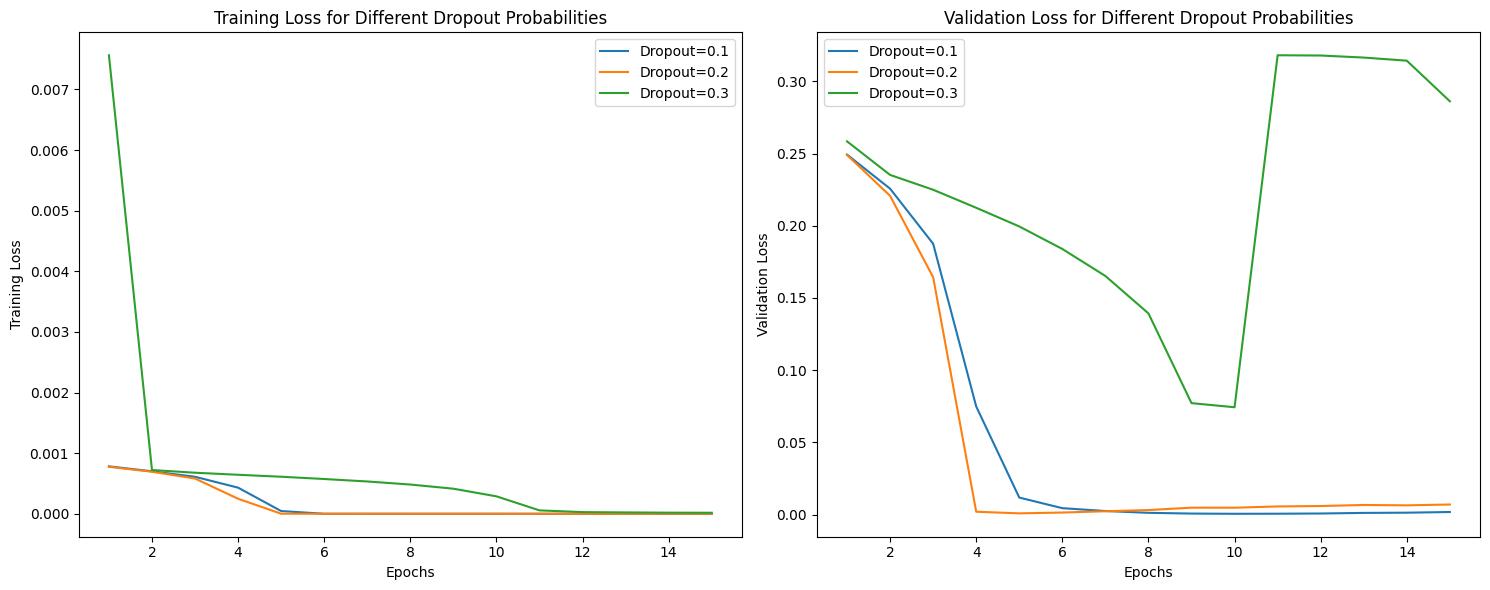

In [34]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot training losses for each dropout probability
axes[0].plot(range(1, num_epochs + 1), train_losses_all[0.1], label='Dropout=0.1')
axes[0].plot(range(1, num_epochs + 1), train_losses_all[0.2], label='Dropout=0.2')
axes[0].plot(range(1, num_epochs + 1), train_losses_all[0.3], label='Dropout=0.3')
axes[0].set_title('Training Loss for Different Dropout Probabilities')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Training Loss')
axes[0].legend()

# Plot validation losses for each dropout probability
axes[1].plot(range(1, num_epochs + 1), val_losses_all[0.1], label='Dropout=0.1')
axes[1].plot(range(1, num_epochs + 1), val_losses_all[0.2], label='Dropout=0.2')
axes[1].plot(range(1, num_epochs + 1), val_losses_all[0.3], label='Dropout=0.3')
axes[1].set_title('Validation Loss for Different Dropout Probabilities')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Validation Loss')
axes[1].legend()

# Display the plots
plt.tight_layout()
plt.show()


- This plot compares the **training loss** and **validation loss** across different dropout probabilities (0.1, 0.2, and 0.3) for 15 epochs. 
- The **left graph** shows the training loss, which steadily decreases for all dropout probabilities as the model learns from the data. 
- The differences between the dropout values are minimal, with slightly lower training losses for higher dropout probabilities, indicating less overfitting. - - The **right graph** represents the validation loss, showing how well the model generalizes to unseen data. 
- Here, dropout probabilities of 0.2 and 0.3 show more stable and lower validation losses after the initial epochs compared to dropout 0.1, which fluctuates and stabilizes at a higher loss. 
- This indicates that dropout 0.2 and 0.3 are more effective in preventing overfitting and helping the model generalize better. 
- Overall, the validation loss for dropout 0.2 converges to the lowest value, making it the best choice for the final model.

### Final model


- Here , I am taking the drop out 0.2 for further analysis .


In [35]:
# Training with dropout probability of 0.2
dropout_prob = 0.2
print(f"Training with dropout probability: {dropout_prob}")

# Create the model for the fixed dropout probability
model = LSTMModel(input_size, hidden_layer_size, output_size, dropout_prob).to(device)

# Define Loss and Optimizer
criterion = nn.MSELoss()  # Mean Squared Error for regression
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Reset the loss trackers
train_losses = []
val_losses = []

# Train the model with validation loss tracking
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_train_loss = 0.0

    # Training loop
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)  # Ensure tensors are on the same device
        optimizer.zero_grad()  # Clear previous gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, targets.view(-1, 1))  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        running_train_loss += loss.item()

    # Calculate average training loss
    avg_train_loss = running_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Validation loop
    model.eval()  # Set the model to evaluation mode
    running_val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)  # Ensure tensors are on the same device
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, targets.view(-1, 1))  # Compute loss
            running_val_loss += loss.item()

    # Calculate average validation loss
    avg_val_loss = running_val_loss / len(test_loader)
    val_losses.append(avg_val_loss)

    # Print epoch metrics
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}')


Training with dropout probability: 0.2
Epoch 1/15, Train Loss: 0.0008, Validation Loss: 0.2584
Epoch 2/15, Train Loss: 0.0007, Validation Loss: 0.2334
Epoch 3/15, Train Loss: 0.0006, Validation Loss: 0.1904
Epoch 4/15, Train Loss: 0.0004, Validation Loss: 0.0316
Epoch 5/15, Train Loss: 0.0000, Validation Loss: 0.0015
Epoch 6/15, Train Loss: 0.0000, Validation Loss: 0.0010
Epoch 7/15, Train Loss: 0.0000, Validation Loss: 0.0014
Epoch 8/15, Train Loss: 0.0000, Validation Loss: 0.0028
Epoch 9/15, Train Loss: 0.0000, Validation Loss: 0.0038
Epoch 10/15, Train Loss: 0.0000, Validation Loss: 0.0047
Epoch 11/15, Train Loss: 0.0000, Validation Loss: 0.0058
Epoch 12/15, Train Loss: 0.0000, Validation Loss: 0.0064
Epoch 13/15, Train Loss: 0.0000, Validation Loss: 0.0075
Epoch 14/15, Train Loss: 0.0000, Validation Loss: 0.0082
Epoch 15/15, Train Loss: 0.0000, Validation Loss: 0.0086


In [36]:
# Model evaluation and metrics calculation
model.eval()
with torch.no_grad():
    test_predictions = []
    test_actuals = []
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)  # Ensure tensors are on the same device
        outputs = model(inputs)
        test_predictions.extend(outputs.squeeze().cpu().numpy())  # Detach predictions to CPU for evaluation
        test_actuals.extend(targets.cpu().numpy())  # Detach actual values to CPU for evaluation

# Convert lists to numpy arrays
test_predictions = np.array(test_predictions)
test_actuals = np.array(test_actuals)

# Calculate metrics
final_mae = mean_absolute_error(test_actuals, test_predictions)
final_mse = mean_squared_error(test_actuals, test_predictions)
final_rmse = math.sqrt(mse)
final_r2 = r2_score(test_actuals, test_predictions)

# Print metrics
print(f"Mean Absolute Error (MAE): {final_mae:.4f}")
print(f"Mean Squared Error (MSE): {final_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {final_rmse:.4f}")
print(f"R2 Score: {final_r2:.4f}")


Mean Absolute Error (MAE): 0.0574
Mean Squared Error (MSE): 0.0069
Root Mean Squared Error (RMSE): 0.1370
R2 Score: 0.9032


- Here after running the final model we can see better results in the error rate .

In [37]:
# Evaluate the final model (dropout = 0.2) on the test data
model.eval()
with torch.no_grad():
    predicted_close_prices = []
    real_close_prices = []
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)  # Ensure tensors are on the same device
        outputs = model(inputs)  # Get model predictions
        predicted_close_prices.extend(outputs.squeeze().cpu().numpy())  # Detach predictions to CPU
        real_close_prices.extend(targets.cpu().numpy())  # Detach actual values to CPU

# Convert lists to numpy arrays
predicted_close_prices = np.array(predicted_close_prices)
real_close_prices = np.array(real_close_prices)

# Plot Predicted vs. Real Close Prices
fig = go.Figure()

# Add real close prices to the plot
fig.add_trace(go.Scatter(
    x=np.arange(len(real_close_prices)),
    y=real_close_prices,
    mode='lines',
    name='Real Close Price',
    line=dict(color='blue')
))

# Add predicted close prices to the plot
fig.add_trace(go.Scatter(
    x=np.arange(len(predicted_close_prices)),
    y=predicted_close_prices,
    mode='lines',
    name='Predicted Close Price',
    line=dict(color='red', dash='dot')
))

# Customize the layout
fig.update_layout(
    title='Predicted vs. Real Close Prices (Dropout=0.2)',
    xaxis_title='Time Steps',
    yaxis_title='Close Price',
    template='plotly_dark',
    showlegend=True
)

# Show the final plot
fig.show()


This plot compares the real close prices (blue line) and the predicted close prices (red dashed line) for Apple Inc. using the final model with a dropout probability of 0.2. The x-axis represents the time steps, while the y-axis shows the normalized close prices. The real close prices exhibit natural fluctuations and trends over time, reflecting the actual market behavior. The predicted prices follow the overall trend of the real prices, showing that the model captures the general movement of the stock prices reasonably well. However, the predicted prices are smoother and less volatile than the real prices, indicating that the model struggles to capture some of the smaller fluctuations and more intricate dynamics. While the model demonstrates a good understanding of the overall trend, its predictions slightly lag in precision for sharp changes, suggesting room for improvement in capturing finer market details.

- Tensor board

In [38]:
# Set TensorBoard writer
log_dir = f"./logs/dropout_{dropout_prob}"
writer = SummaryWriter(log_dir=log_dir)

# Initialize early stopping variables
patience = 5  # Number of epochs to wait before stopping
best_val_loss = float('inf')  # Set the best validation loss to a very high value
epochs_without_improvement = 0  # Counter to track epochs without improvement

# Train the model with TensorBoard logging and early stopping
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_train_loss = 0.0

    # Training loop
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)  # Ensure tensors are on the same device
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, targets.view(-1, 1))  # Compute the loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update the model parameters
        running_train_loss += loss.item()

    avg_train_loss = running_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Validation loop
    model.eval()  # Set the model to evaluation mode
    running_val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)  # Ensure tensors are on the same device
            outputs = model(inputs)
            loss = criterion(outputs, targets.view(-1, 1))
            running_val_loss += loss.item()

    avg_val_loss = running_val_loss / len(test_loader)
    val_losses.append(avg_val_loss)

    # Log the training and validation losses to TensorBoard
    writer.add_scalar("Loss/Train", avg_train_loss, epoch)
    writer.add_scalar("Loss/Validation", avg_val_loss, epoch)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}')

    # Early stopping condition
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss  # Update best validation loss
        epochs_without_improvement = 0  # Reset counter
    else:
        epochs_without_improvement += 1

    # If patience is exceeded, stop training
    if epochs_without_improvement >= patience:
        print(f"Early stopping triggered at epoch {epoch+1}")
        break

# Close the TensorBoard writer after training is complete
writer.close()


Epoch 1/15, Train Loss: 0.0000, Validation Loss: 0.0090
Epoch 2/15, Train Loss: 0.0000, Validation Loss: 0.0088
Epoch 3/15, Train Loss: 0.0000, Validation Loss: 0.0092
Epoch 4/15, Train Loss: 0.0000, Validation Loss: 0.0089
Epoch 5/15, Train Loss: 0.0000, Validation Loss: 0.0092
Epoch 6/15, Train Loss: 0.0000, Validation Loss: 0.0093
Epoch 7/15, Train Loss: 0.0000, Validation Loss: 0.0100
Early stopping triggered at epoch 7


In [39]:
log_dir = './logs'
writer = SummaryWriter(log_dir)


In [40]:
%tensorboard --logdir ./logs


Reusing TensorBoard on port 6006 (pid 62484), started 21:40:06 ago. (Use '!kill 62484' to kill it.)

![Screenshot](![Screenshot 2024-11-17 at 23.30.40.png](<attachment:Screenshot 2024-11-17 at 23.30.40.png>))

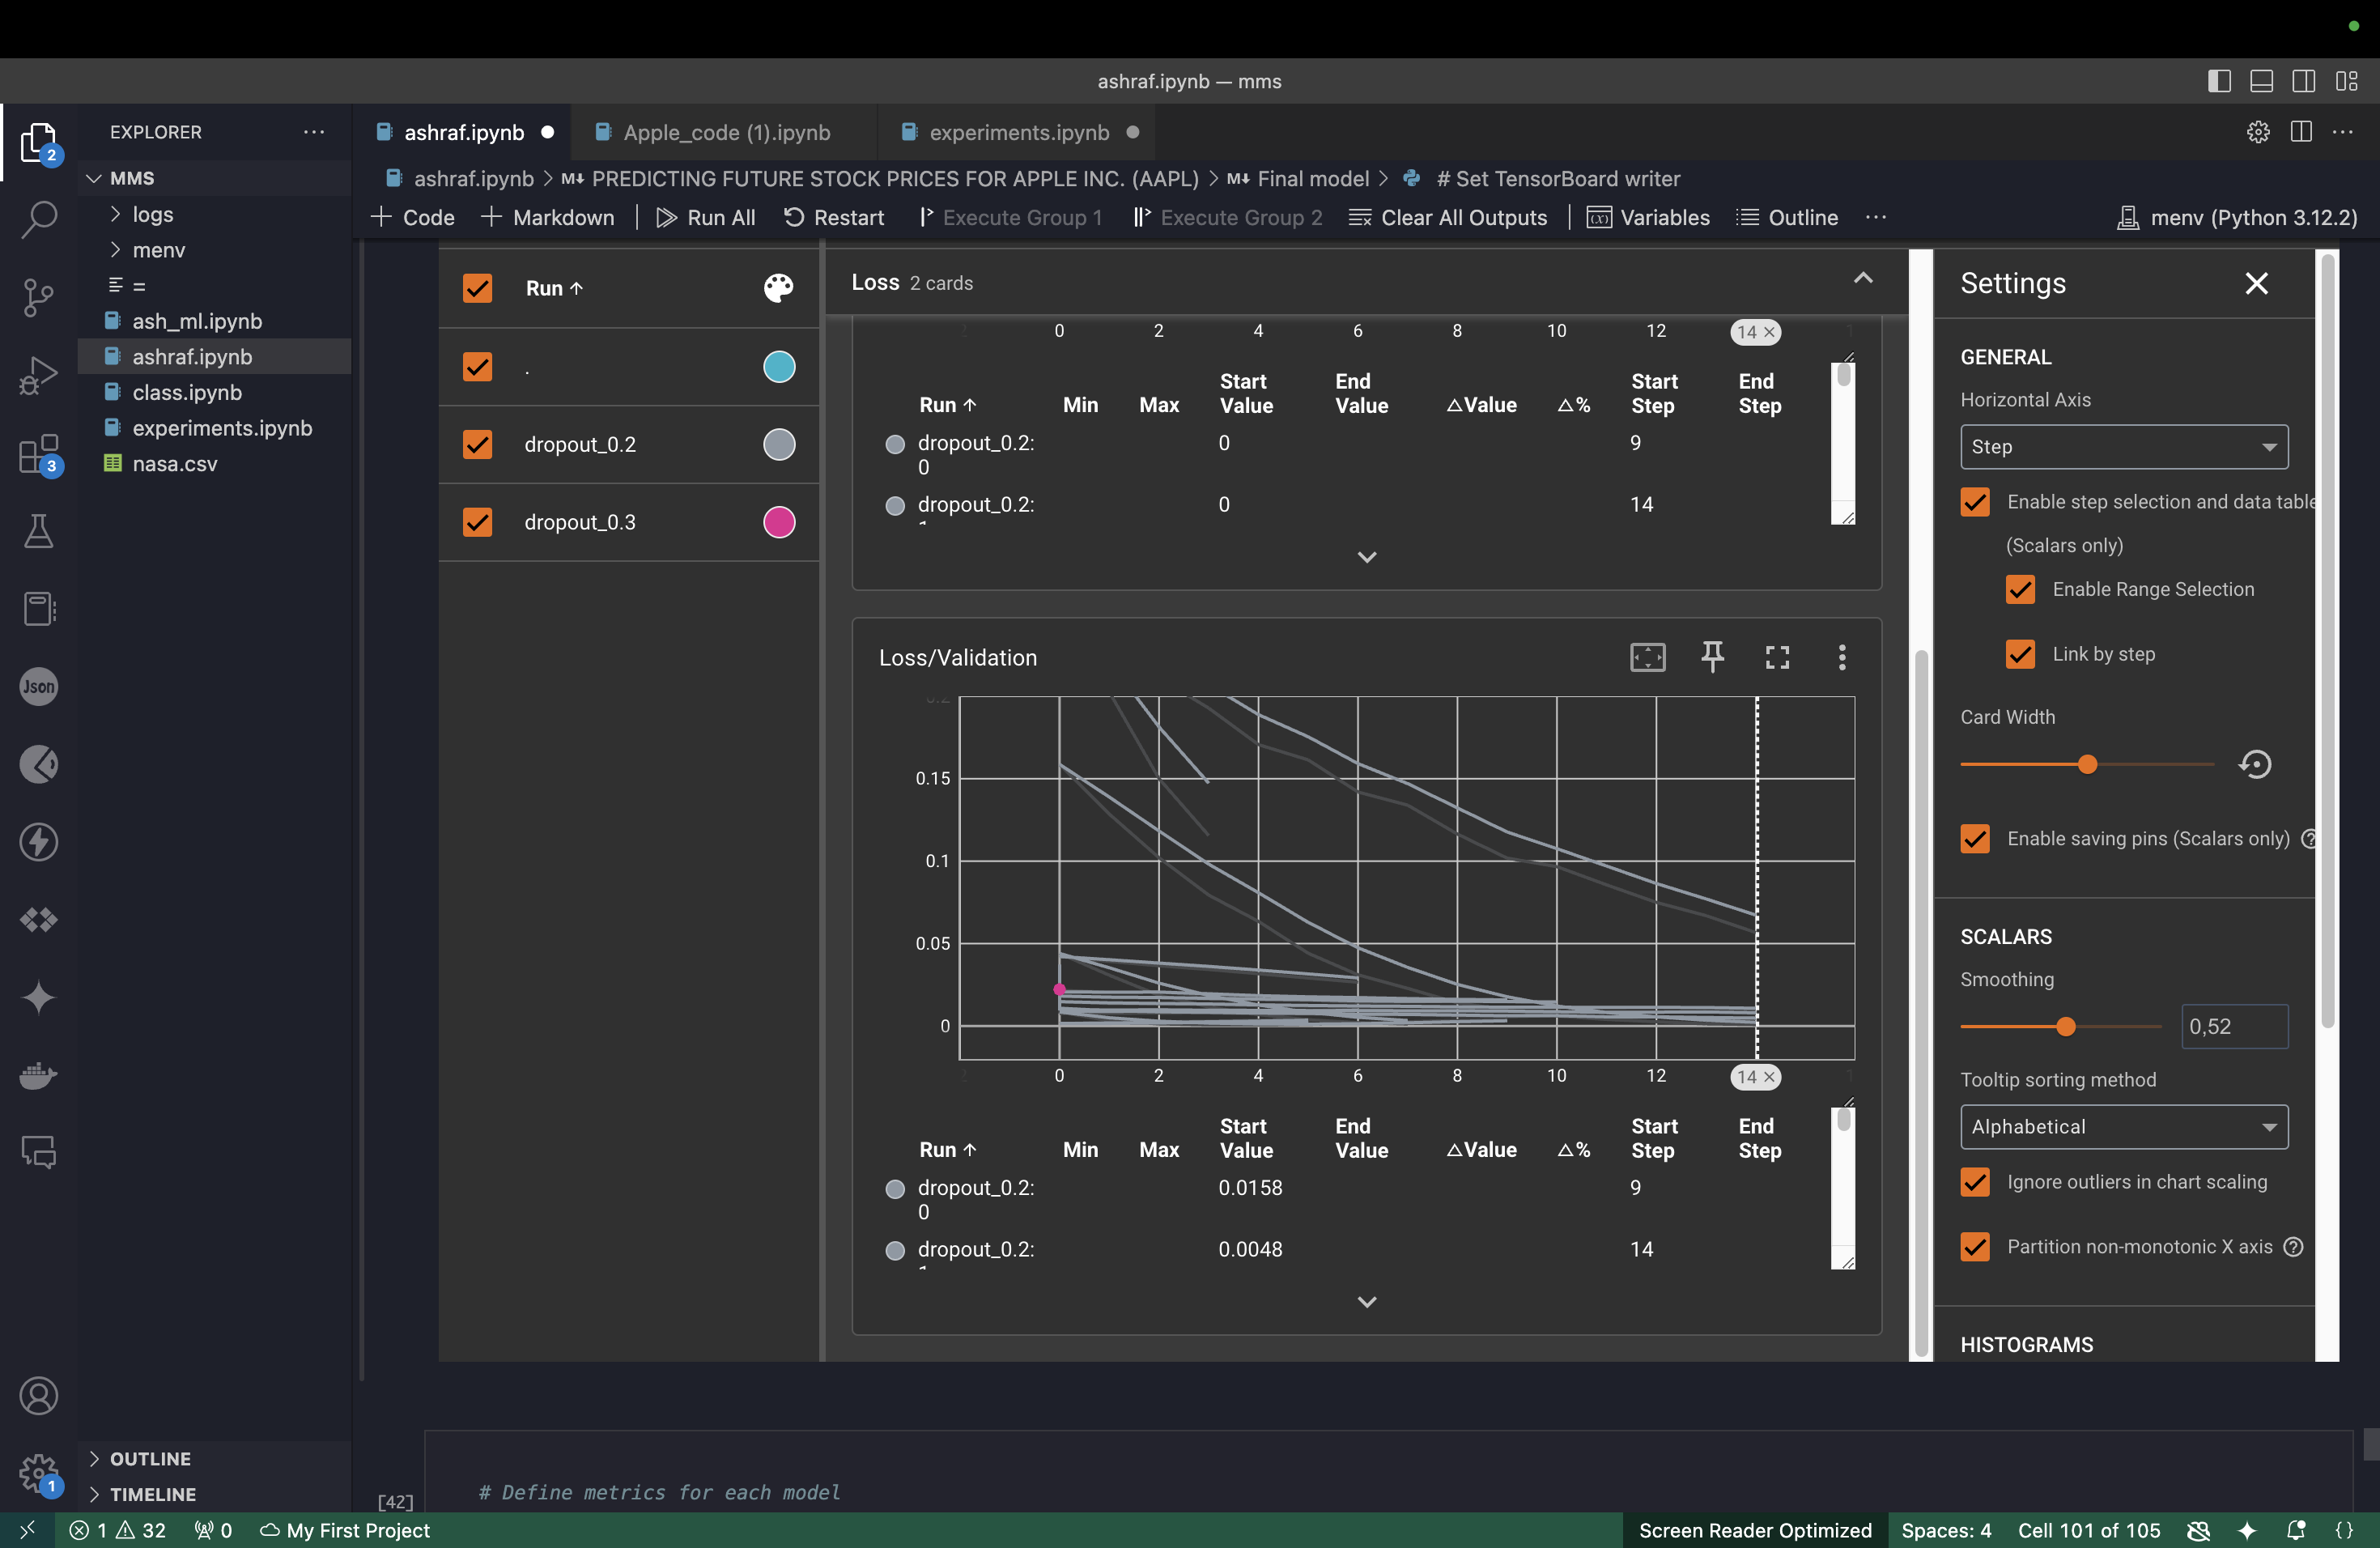

![Screenshot](![![Screenshot 2024-11-17 at 23.30.31.png](<attachment:Screenshot 2024-11-17 at 23.30.31.png>)]

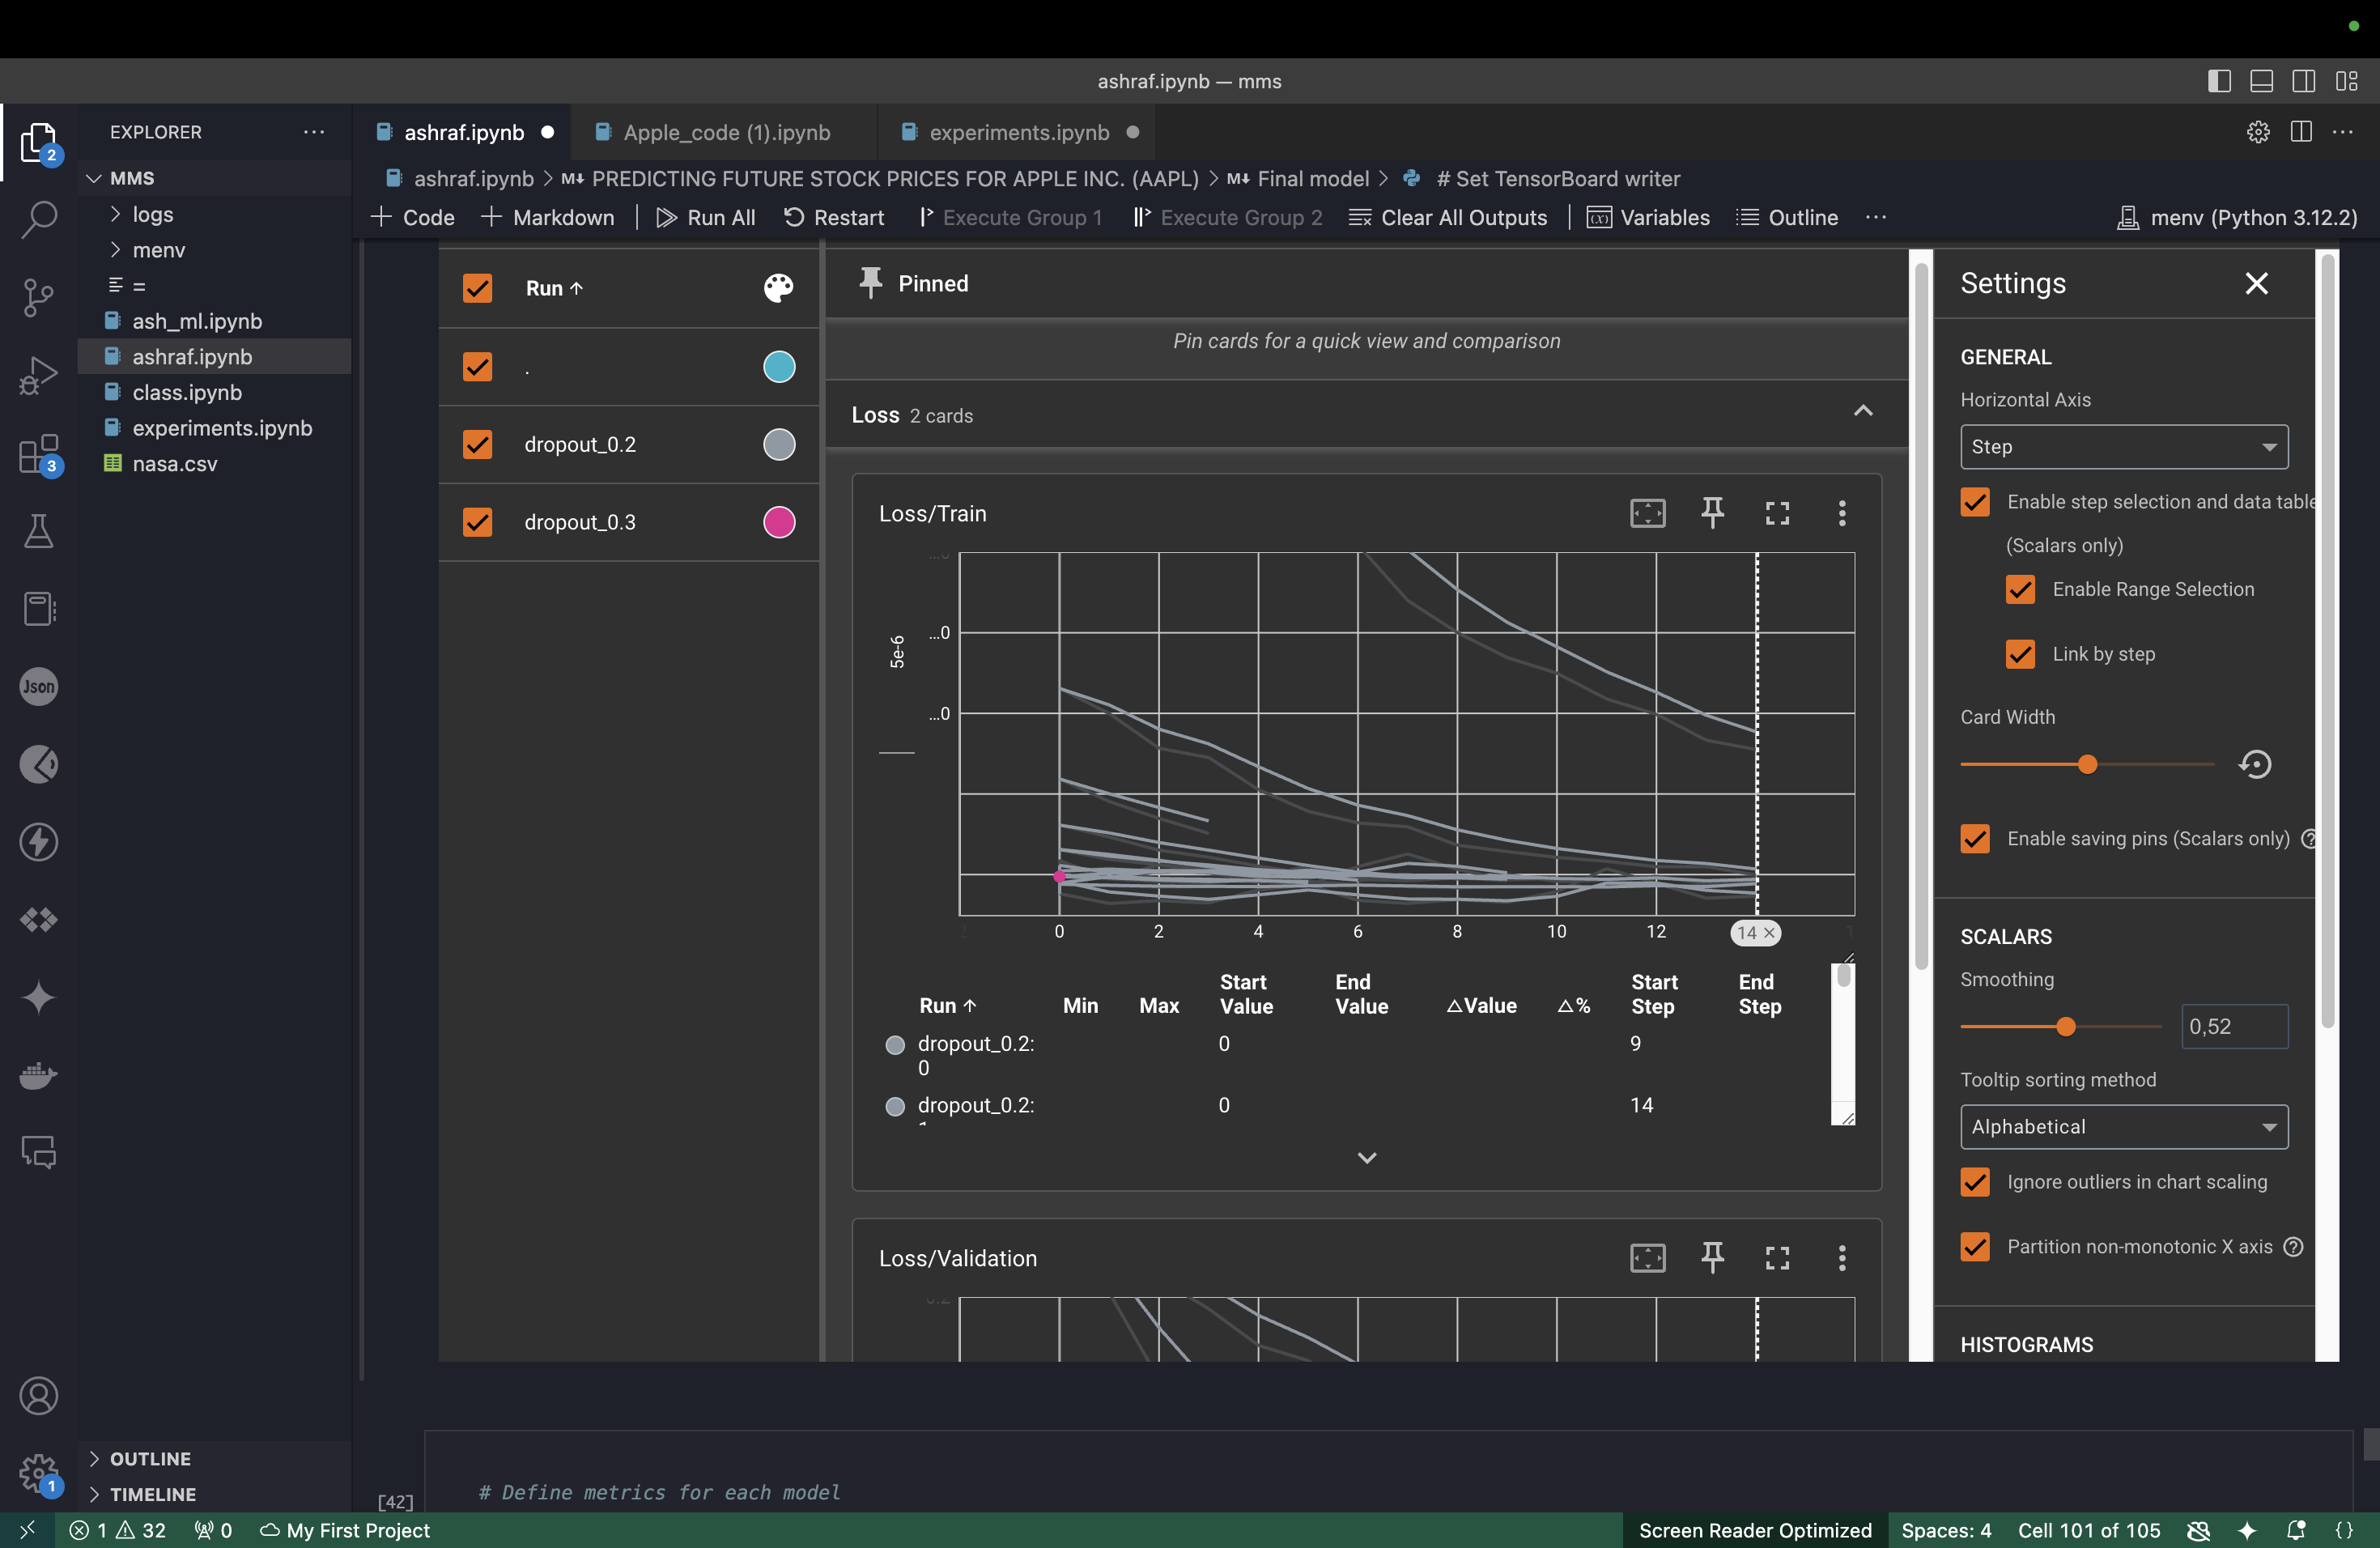

### Comparision

- Creating table 

In [42]:

metrics = {
    "Model": ["LSTM with dropouts", "SVM", "median_model","Basic LSTM"],
    "MAE": [final_mae, svm_mae,median_mae, mae],
    "MSE": [final_mse, svm_mse, median_mse,mse],
    "RSME":[final_rmse,svm_rmse,median_rmse,rmse],
    "r2_score":[final_r2,svm_r2,median_r2,r2]
}

# Create a DataFrame to display as a table
metrics_table = pd.DataFrame(metrics)

# Display the table
metrics_table


,Model,MAE,MSE,RSME,r2_score
0,LSTM with dropouts,0.057363,0.006896,0.136951,0.903198
1,SVM,1.482071,36.713690,6.059182,0.984244
2,median_model,22.679125,2846.875505,53.356120,-0.215394
3,Basic LSTM,0.103708,0.018756,0.136951,0.736723


## Conclusion

This table compares the performance of different models based on key metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RSME), and R² score. The **LSTM with dropouts** performs well, with a low MAE (0.057), MSE (0.0068), and a strong R² score of 0.90, indicating it captures the trends effectively while avoiding overfitting. The **SVM model** has a higher MAE (1.48) and MSE (36.71) but achieves an excellent R² score of 0.98, suggesting it explains variance well despite larger errors. The **median model**, used as a baseline, performs poorly with very high errors (MAE: 22.67, MSE: 2846.87) and a negative R² score, meaning it fails to represent the data. Lastly, the **Basic LSTM** shows moderate performance with a higher MAE (0.103) and a lower R² score (0.73) compared to the dropout-enhanced LSTM, highlighting the importance of regularization. Overall, the LSTM with dropouts offers the best balance between accuracy and generalization.

## Limitations

⁠- ⁠This model is trained on historical data, which may not capture sudden market shifts.
- ⁠Stock price data may benefit from additional external factors (e.g., economic indicators).
- ⁠It relies on the chosen features, which may not fully capture market complexity.
-  ⁠Overfitting can occur if the model becomes too specific to the training data.



## FUTURE WORK

- ⁠Use additional financial indicators to improve accuracy.
- ⁠ ⁠Explore hyperparameter tuning for LSTM layers.
- ⁠Adapt the model to predict trends for other stocks in the same sector, leveraging insights from this training.
- ⁠Enable real-time predictions using live market data.
- ⁠Test the model on volatile or bearish market data for reliability.

### END